In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
plt.style.use('ggplot')


# 读取数据并观察特征
## 读取数据集

数据集已经分类存在了data文件夹中

In [38]:
mobile = pd.read_csv('data/mobile.csv', na_values=['\N'])
mobile['label'] = 'mobile'
bike = pd.read_csv('data/bike.csv', na_values=['\N'])
bike['label'] = 'bike'
metro = pd.read_csv('data/metro.csv', na_values=['\N'])
metro['label'] = 'metro'
labels = ['mobile', 'bike', 'metro']

In [41]:
metro.describe()

,phone_no,velocity_arith_avg,x_velocity,velocity_avg,total_distance,ratio_distance,record_num,avg_neighbor_angle,avg_total_angle,avg_abs_neighbor_angle,...,std_neighbor_angle,std_total_angle,std_abs_neighbor_angle,std_abs_total_angle,total_wait_time,cnt_grid_level1,cnt_grid_level2,hw_distance,abs_avg_neighbor_angle,abs_avg_total_angle
count,2.700000e+04,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000
mean,1.475890e+10,56.858814,117.765250,41.927724,18.399050,1.290328,17.356556,-0.007645,-5.132434,110.732979,...,132.635640,84.958860,71.335769,68.158740,720.605852,14.983519,20.297889,14.531001,17.473573,58.996122
std,1.636801e+09,19.811477,46.163333,16.278575,13.388273,0.591738,14.534969,38.335898,79.882466,45.072516,...,58.095909,36.328054,31.516623,37.508366,598.931928,9.797146,15.402044,9.103314,34.121900,54.100646
min,1.340200e+10,1.817044,1.000000,2.295862,0.054846,0.011425,1.000000,-351.511537,-351.740444,0.000003,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.489328,0.000000,0.000771
25%,1.368192e+10,41.919180,80.900000,30.255504,8.987586,0.938825,7.000000,-6.499276,-47.587387,83.671132,...,107.119237,69.766756,59.843707,44.480648,277.000000,8.000000,10.000000,8.189492,2.383378,17.167004
50%,1.390162e+10,57.125606,126.000000,39.683130,15.151271,1.187892,13.000000,-0.052160,-5.161947,109.307797,...,135.909951,88.404256,73.273312,64.230156,588.000000,12.000000,15.000000,12.394670,6.301828,42.262166
75%,1.522171e+10,71.620704,156.600000,51.482515,24.301341,1.512221,23.000000,6.086733,35.545069,137.196271,...,166.275205,107.313750,88.470074,94.027061,1003.000000,19.000000,26.000000,18.601021,16.710311,86.168093
max,1.882130e+10,99.999144,199.000000,99.991203,141.607984,4.993864,139.000000,348.336243,359.850148,351.511537,...,493.077030,246.457300,242.844691,236.617698,3591.000000,119.000000,197.000000,100.404141,351.511537,359.850148


In [42]:
mobile.describe()

,phone_no,velocity_arith_avg,x_velocity,velocity_avg,total_distance,ratio_distance,record_num,avg_neighbor_angle,avg_total_angle,avg_abs_neighbor_angle,...,std_neighbor_angle,std_total_angle,std_abs_neighbor_angle,std_abs_total_angle,total_wait_time,cnt_grid_level1,cnt_grid_level2,hw_distance,abs_avg_neighbor_angle,abs_avg_total_angle
count,2.700000e+04,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000
mean,1.450329e+10,61.605203,130.680835,39.464154,20.956504,1.518561,25.329148,-0.129221,-3.297553,116.508516,...,140.214044,91.311554,74.897286,73.420331,498.971519,17.983852,27.793037,14.031535,12.738562,63.372826
std,1.418274e+09,19.542586,41.682314,15.924793,18.310745,0.698349,22.655354,31.335895,84.197114,39.564697,...,49.599923,31.170081,26.973296,35.066878,599.404435,14.106799,22.573005,10.616878,28.630020,55.531653
min,1.340200e+10,1.400387,1.000000,2.800795,0.090772,0.015183,1.000000,-347.041748,-353.245769,0.034810,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.448724,0.000000,0.000552
25%,1.367176e+10,47.861047,105.250000,27.816045,8.561409,1.096025,10.000000,-4.494297,-48.962827,92.718036,...,117.279690,77.547320,63.639494,49.720516,91.000000,8.000000,12.000000,6.429926,1.652875,19.127748
50%,1.381805e+10,62.481026,140.600000,37.761328,15.965669,1.370930,19.000000,-0.032561,-3.353750,114.835434,...,140.971940,92.414763,75.119160,68.009342,294.000000,14.000000,22.000000,11.252153,4.346525,46.098605
75%,1.502128e+10,76.405972,163.400000,49.468184,27.557875,1.752500,34.000000,4.193602,43.265055,139.890267,...,168.644273,111.213220,90.129659,100.364811,675.000000,23.000000,36.000000,18.371933,11.180790,96.372107
max,1.882130e+10,99.996392,199.000000,99.993332,203.142838,4.998644,304.000000,345.598857,357.615215,347.041748,...,474.554125,252.313541,244.687888,249.875009,3599.000000,172.000000,257.000000,91.747900,347.041748,357.615215


In [18]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27000 entries, 0 to 26999
Data columns (total 22 columns):
phone_no                  27000 non-null int64
velocity_arith_avg        27000 non-null float64
x_velocity                27000 non-null float64
velocity_avg              27000 non-null float64
total_distance            27000 non-null float64
ratio_distance            27000 non-null float64
record_num                27000 non-null int64
avg_neighbor_angle        27000 non-null float64
avg_total_angle           27000 non-null float64
avg_abs_neighbor_angle    27000 non-null float64
avg_abs_total_angle       27000 non-null float64
std_neighbor_angle        27000 non-null float64
std_total_angle           27000 non-null float64
std_abs_neighbor_angle    27000 non-null float64
std_abs_total_angle       27000 non-null float64
total_wait_time           27000 non-null int64
cnt_grid_level1           27000 non-null int64
cnt_grid_level2           27000 non-null int64
hw_distance        

In [19]:
data1 = mobile.dropna()
data2 = bike.dropna()
data3 = metro.dropna()

In [20]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27000 entries, 0 to 26999
Data columns (total 22 columns):
phone_no                  27000 non-null int64
velocity_arith_avg        27000 non-null float64
x_velocity                27000 non-null float64
velocity_avg              27000 non-null float64
total_distance            27000 non-null float64
ratio_distance            27000 non-null float64
record_num                27000 non-null int64
avg_neighbor_angle        27000 non-null float64
avg_total_angle           27000 non-null float64
avg_abs_neighbor_angle    27000 non-null float64
avg_abs_total_angle       27000 non-null float64
std_neighbor_angle        27000 non-null float64
std_total_angle           27000 non-null float64
std_abs_neighbor_angle    27000 non-null float64
std_abs_total_angle       27000 non-null float64
total_wait_time           27000 non-null int64
cnt_grid_level1           27000 non-null int64
cnt_grid_level2           27000 non-null int64
hw_distance        

In [21]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27000 entries, 0 to 26999
Data columns (total 22 columns):
phone_no                  27000 non-null int64
velocity_arith_avg        27000 non-null float64
x_velocity                27000 non-null float64
velocity_avg              27000 non-null float64
total_distance            27000 non-null float64
ratio_distance            27000 non-null float64
record_num                27000 non-null int64
avg_neighbor_angle        27000 non-null float64
avg_total_angle           27000 non-null float64
avg_abs_neighbor_angle    27000 non-null float64
avg_abs_total_angle       27000 non-null float64
std_neighbor_angle        27000 non-null float64
std_total_angle           27000 non-null float64
std_abs_neighbor_angle    27000 non-null float64
std_abs_total_angle       27000 non-null float64
total_wait_time           27000 non-null int64
cnt_grid_level1           27000 non-null int64
cnt_grid_level2           27000 non-null int64
hw_distance        

In [22]:
df = pd.concat([data1.sample(n=10000, random_state=11), data2.sample(n=10000, random_state=11)])
data = df.reset_index(drop=True)

## 观察数据集
主要是从以下几个角度观察：
1. 是否有缺失值
2. 数据类型是否正确
3. 数据是否存在异常值
4. 数据是否在统计学上存在某种规律
5. 数据分布是否存在某种规律性

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
phone_no                  20000 non-null int64
velocity_arith_avg        20000 non-null float64
x_velocity                20000 non-null float64
velocity_avg              20000 non-null float64
total_distance            20000 non-null float64
ratio_distance            20000 non-null float64
record_num                20000 non-null int64
avg_neighbor_angle        20000 non-null float64
avg_total_angle           20000 non-null float64
avg_abs_neighbor_angle    20000 non-null float64
avg_abs_total_angle       20000 non-null float64
std_neighbor_angle        20000 non-null float64
std_total_angle           20000 non-null float64
std_abs_neighbor_angle    20000 non-null float64
std_abs_total_angle       20000 non-null float64
total_wait_time           20000 non-null int64
cnt_grid_level1           20000 non-null int64
cnt_grid_level2           20000 non-null int64
hw_distance        

In [24]:
data.describe()

,phone_no,velocity_arith_avg,x_velocity,velocity_avg,total_distance,ratio_distance,record_num,avg_neighbor_angle,avg_total_angle,avg_abs_neighbor_angle,...,std_neighbor_angle,std_total_angle,std_abs_neighbor_angle,std_abs_total_angle,total_wait_time,cnt_grid_level1,cnt_grid_level2,hw_distance,abs_avg_neighbor_angle,abs_avg_total_angle
count,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,1.457059e+10,57.496437,122.982695,38.005958,19.224931,1.473581,22.354950,-0.167348,-4.910842,115.559379,...,138.269200,89.461186,73.467316,71.837755,529.840550,16.082100,24.356550,13.378817,14.598073,62.711589
std,1.477731e+09,20.058865,44.643440,15.887327,16.729810,0.675649,19.975047,34.243588,83.613674,41.266809,...,52.309839,32.835390,28.320759,35.741481,592.726738,12.631818,20.110473,10.164617,30.976393,55.519582
min,1.340200e+10,3.247544,3.000000,1.142837,0.118123,0.015183,1.000000,-347.041748,-353.245769,0.022061,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.368384,0.000000,0.003881
25%,1.368162e+10,42.868554,91.600000,26.459322,7.938208,1.063701,9.000000,-5.255234,-50.738675,90.955568,...,115.091443,75.862116,62.182181,48.294123,112.000000,8.000000,11.000000,6.209277,1.918905,18.933455
50%,1.381830e+10,57.953559,131.950000,35.913926,14.898144,1.343420,17.000000,-0.000730,-4.234231,114.440731,...,140.448863,91.591715,74.531546,67.090422,337.000000,13.000000,18.000000,10.789666,5.071082,45.490568
75%,1.502670e+10,72.365296,159.500000,47.651997,25.088613,1.720127,30.000000,4.906845,39.891243,140.156660,...,168.823393,110.471780,89.383904,98.574224,741.000000,20.000000,32.000000,17.470716,13.068160,94.085689
max,1.882129e+10,99.961719,199.000000,99.993332,173.293023,4.995186,304.000000,345.598857,351.754391,347.041748,...,468.085860,242.425491,237.708869,241.154400,3599.000000,145.000000,257.000000,82.888002,347.041748,353.245769


In [26]:
# 获取模型的特征
features = list(data.columns)
features.remove('phone_no')
features.remove('label')
print "features are as below:"
print features

features are as below:
['velocity_arith_avg', 'x_velocity', 'velocity_avg', 'total_distance', 'ratio_distance', 'record_num', 'avg_neighbor_angle', 'avg_total_angle', 'avg_abs_neighbor_angle', 'avg_abs_total_angle', 'std_neighbor_angle', 'std_total_angle', 'std_abs_neighbor_angle', 'std_abs_total_angle', 'total_wait_time', 'cnt_grid_level1', 'cnt_grid_level2', 'hw_distance', 'abs_avg_neighbor_angle', 'abs_avg_total_angle']


feature:  arpu_avg


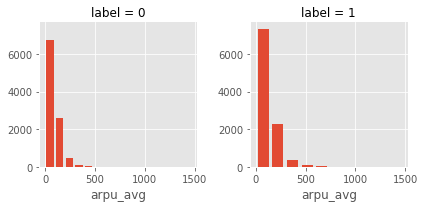

feature:  arpu


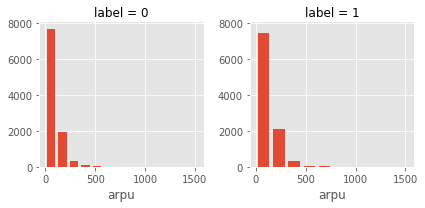

feature:  comm_days


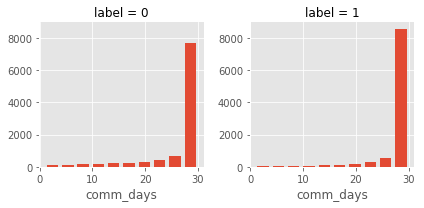

feature:  comm_lac_num


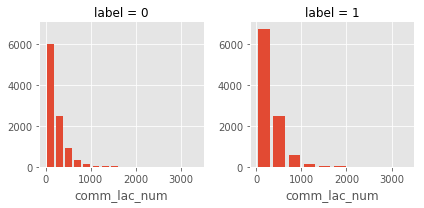

feature:  p2p_sms_up_cnt


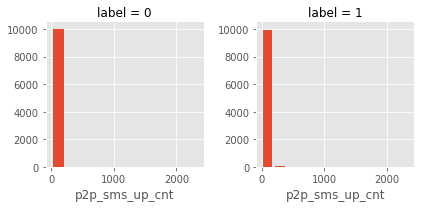

feature:  p2p_mms_up_cnt


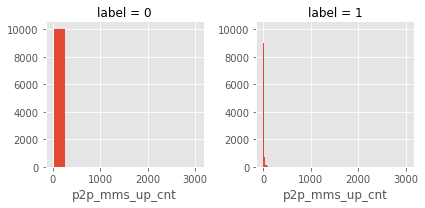

feature:  mon_fee


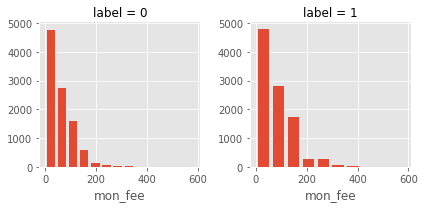

feature:  tc_flow


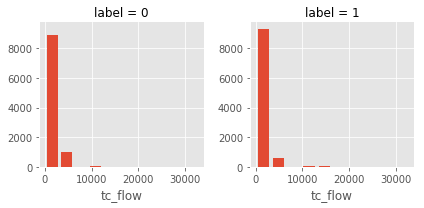

feature:  tc_call_dur


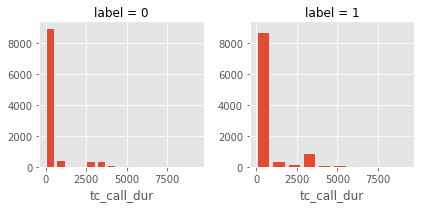

feature:  ct_fee


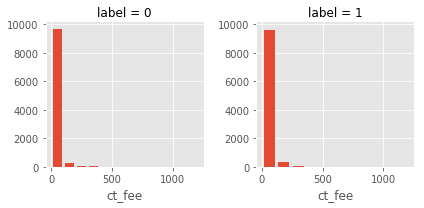

feature:  ct_call_fee


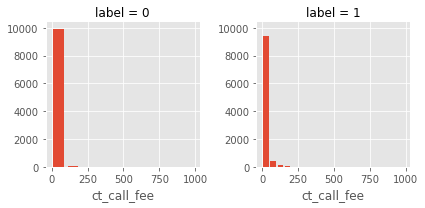

feature:  ct_onnet_fee


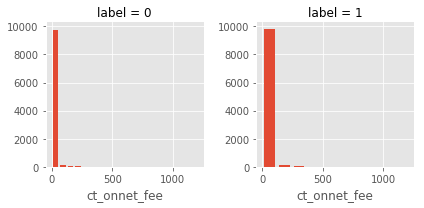

feature:  call_num_avg


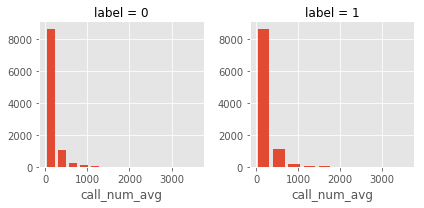

feature:  call_dur_avg


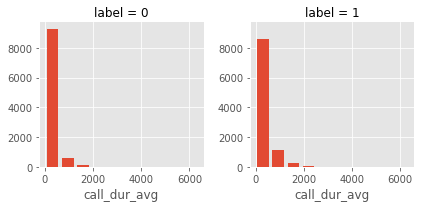

feature:  call_num


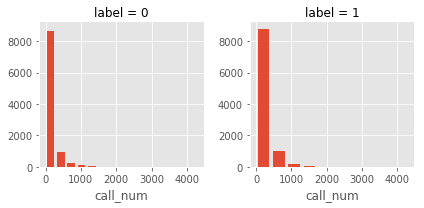

feature:  call_dur


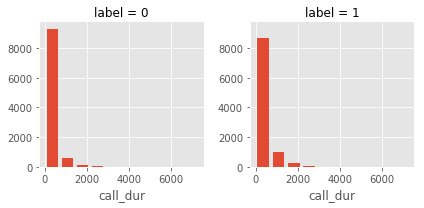

feature:  moc_num


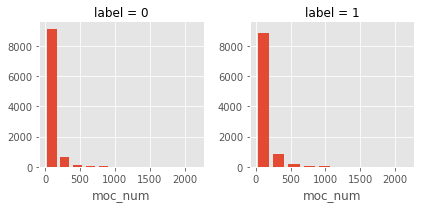

feature:  inner_roam_bill_dur


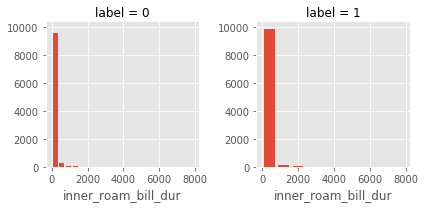

feature:  inner_roam_call_num


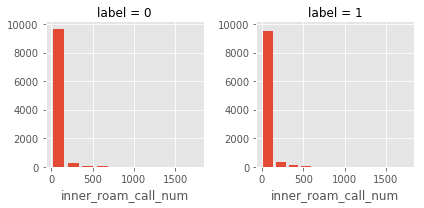

feature:  intl_roam_bill_dur


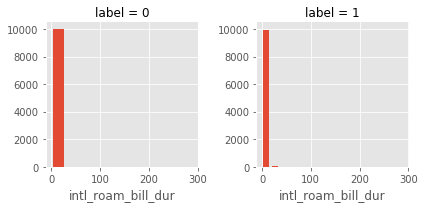

feature:  intl_roam_call_num


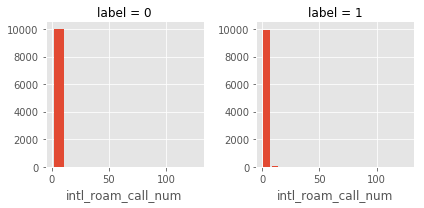

feature:  c10010_moc_num


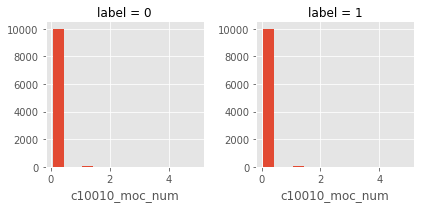

feature:  c10000_moc_num


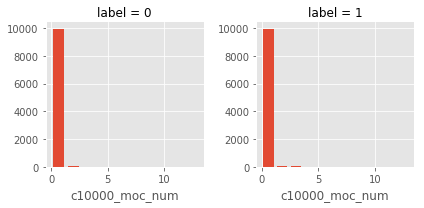

feature:  c10086_moc_num


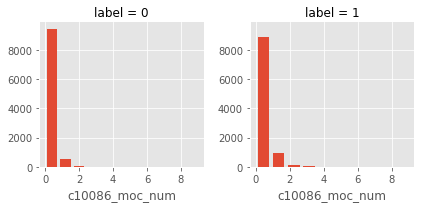

feature:  opp_lt


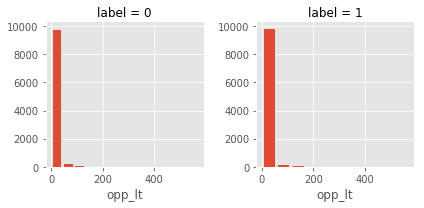

feature:  opp_dx


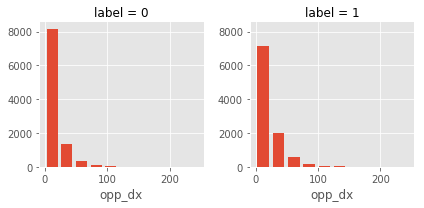

feature:  opp_yd


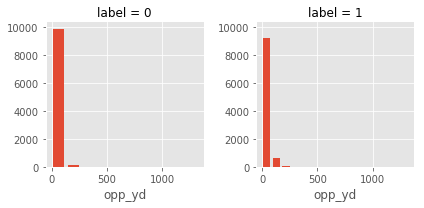

feature:  gprs_avg


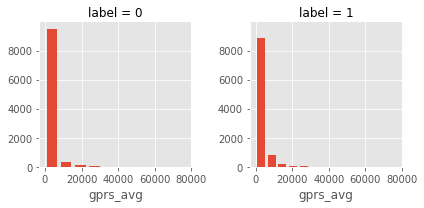

feature:  onnet_num_avg


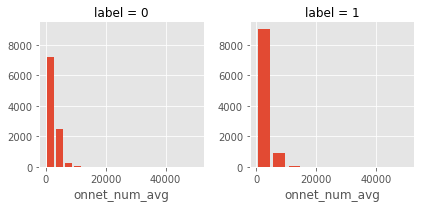

feature:  gprs_flow


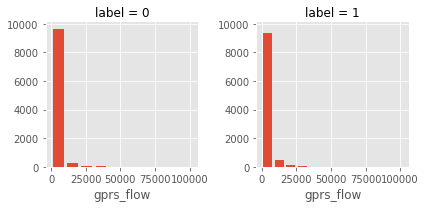

feature:  local_flow


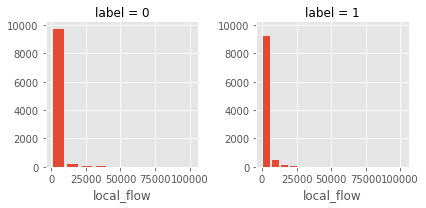

feature:  inner_roam_flow


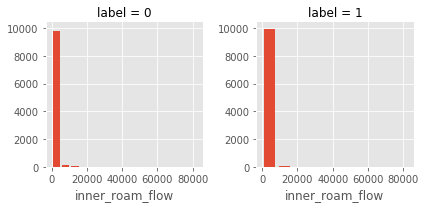

feature:  intl_roam_flow


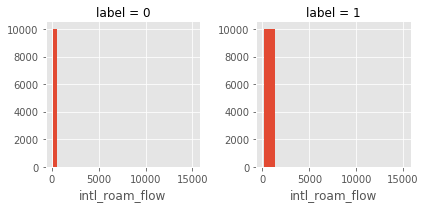

feature:  lively_days


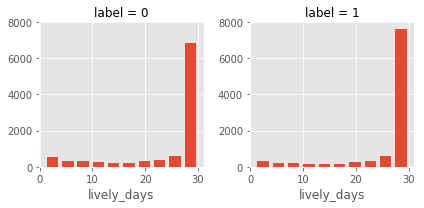

feature:  local_onnet_days


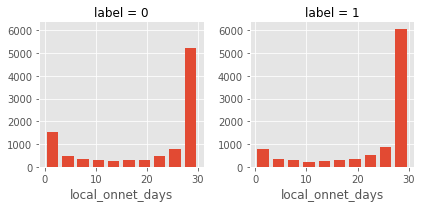

feature:  inner_roam_onnet_days


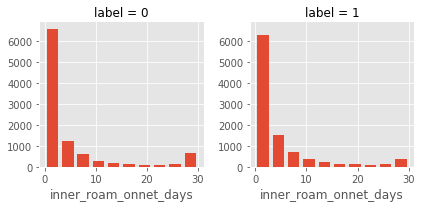

feature:  intl_roam_onnet_days


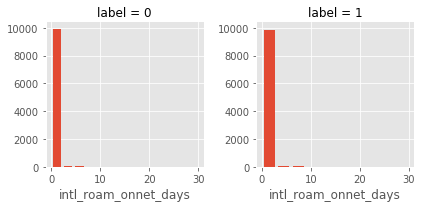

feature:  onnet_num


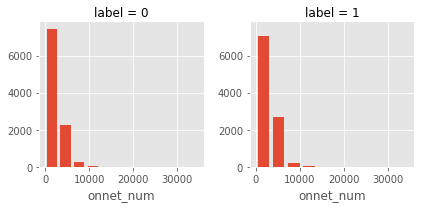

feature:  max_days_cnt


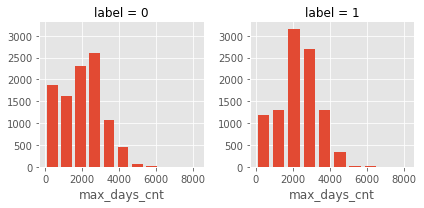

feature:  min_days_cnt


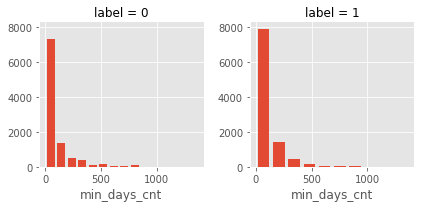

feature:  mid_expire_days


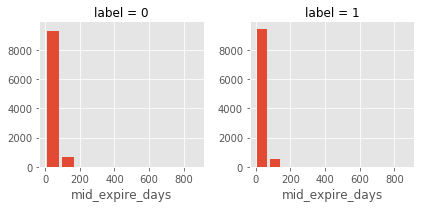

feature:  avg_expire_days


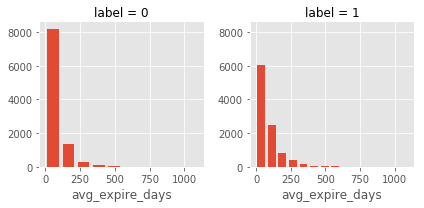

feature:  last_visit_days


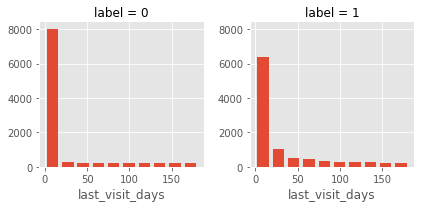

feature:  visit_cnt


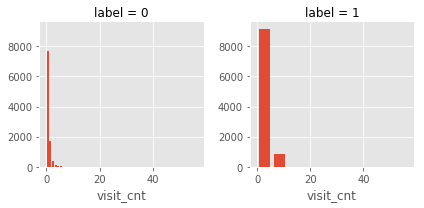

feature:  visit_date_cnt


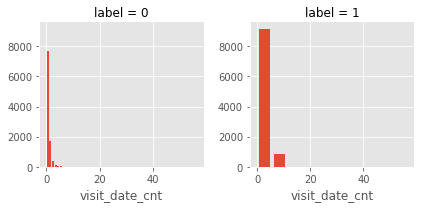

feature:  plan_date_cnt


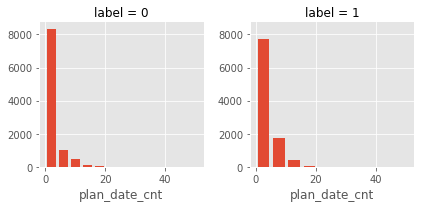

feature:  percent_visit


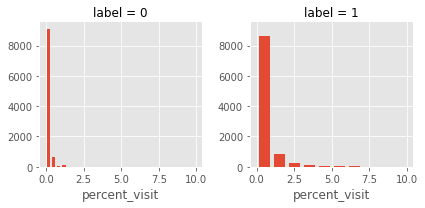

feature:  gender_male


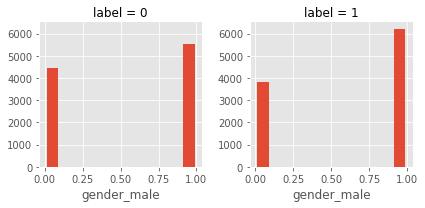

feature:  gender_female


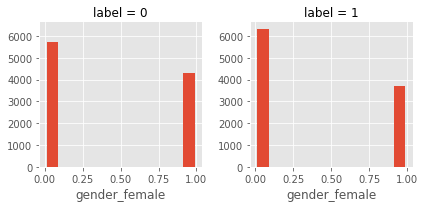

feature:  month_1


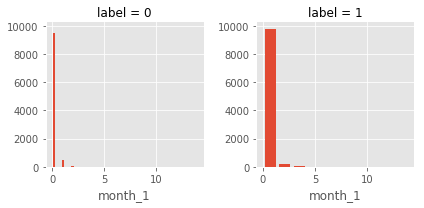

feature:  month_2


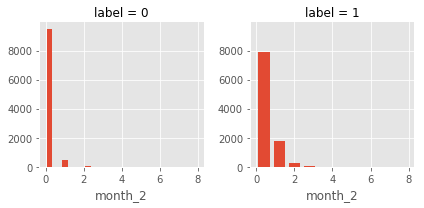

feature:  month_3


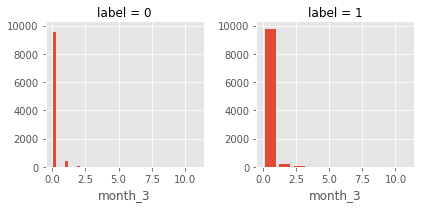

feature:  month_4


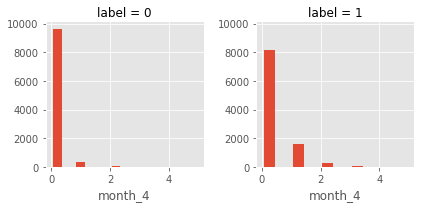

feature:  month_5


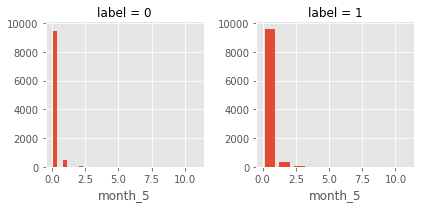

feature:  month_6


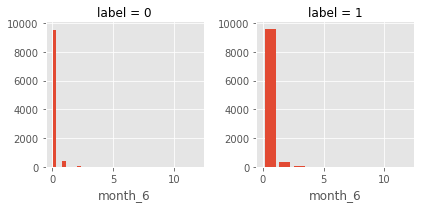

feature:  age 


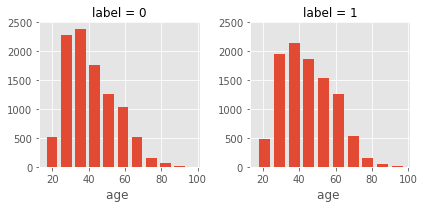

In [30]:
# 观察数据集在不同特征中的数据分布
for feature in features:
    print "feature: ", feature
    plt.figure()
    grid = sns.FacetGrid(data, col = 'label')
    grid.map(plt.hist, feature, bins=10, rwidth=0.75)
    plt.show()

结果显示：
1. 数据集无缺失值，比较明显的异常值也已经在SQL脚本中进行了处理。
2. 部分特征在不同标签下有明显不同的分布，这证明这些特征在模型中有相当的价值

# 数据预处理

在开始进一步的数据探索之前，我们需要对数据进行预处理，为之后的模型训练、特征选择以及调参做准备

数据预处理主要包括两个部分：
1. 数据清洗
2. 数据标准化和归一化

在之前的检查中，由于已经确认没有缺失值和明显的异常值，因此我们可以跳过数据清洗这一步，开始对数据进行归一化。

## 数据集分割

因为在训练基准模型中，我们需要分别准备两个相互独立的数据集：
- 训练集
- 测试集

因此我们将在这里进行数据集的分割，按照4:1的比例将数据集分成训练集和测试集

In [29]:
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as preprocessing


X = data[features].as_matrix()
y = data['label'].as_matrix()

## add pca

In [30]:
# X_pca = pca.transform(X_orig)
# poly = preprocessing.PolynomialFeatures(2)
# X = poly.fit_transform(X_pca)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [31]:
# 检查训练集和测试集的大小是否正确
print X_train.shape
print y_train.shape
print X_test.shape
print y_test.shape

(16000, 20)
(16000,)
(4000, 20)
(4000,)


## 数据归一化

这里我们使用标准归一化，需要注意的是：测试集的标准化必须基于训练集的标准化参数。

In [32]:


# get the parameter of scaling from training set
scaler = preprocessing.StandardScaler()
scale_param = scaler.fit(X_train)

# scaling the training set
X_train_scaled = scaler.fit_transform(X_train, scale_param)

# scaling the test set
X_test_scaled = scaler.fit_transform(X_test, scale_param)

In [33]:
# 检查标准化后的结果
print "training set:"
print X_train_scaled[:2]
print "------------------"
print "test set:"
print X_test_scaled[:2]

training set:
[[ 0.50839447  0.57186344 -1.17414699 -0.55069688  0.43702164 -0.47461931
  -0.06187357 -1.30815238  0.85745936  0.61817156  0.64948957  0.13879025
  -0.25071619  0.62304564 -0.53124463 -0.87950498 -0.66795719 -0.75871022
  -0.4070149   0.92163046]
 [-0.23429602 -0.02499835 -0.4821802   1.60062275 -0.5592502   1.28460293
   0.07217156  0.10690217 -1.19717423 -0.92427888 -0.93906669 -0.81924053
  -0.50265912 -0.81739898 -0.3731541   1.80663966  1.61731314  2.81379108
  -0.38862747 -1.0497959 ]]
------------------
test set:
[[ -4.97870950e-01  -4.65108711e-01  -5.80515912e-02   2.18654649e+00
   -1.74655108e-01  -3.45288309e-01  -5.30910036e-01   7.99637335e-01
   -1.79393204e-04  -2.88445955e-01   4.21067248e-01   4.52974104e-01
    1.19314001e+00   6.39561467e-01  -2.57585718e-01   4.88551924e-01
   -1.49861894e-01   2.71860463e+00   1.54982805e-01  -4.53975847e-02]
 [  1.73109149e-01   3.91191199e-01  -5.01392424e-02  -7.78088400e-04
    1.97708343e-01   6.40651110e-01  

## add pca

# 建立基准模型

我们将基于之前的分析建立三个基准模型（不加以调参，采用默认参数）：
1. logistic regression
2. 决策树
3. 随机森林
4. 支持向量机
5. 神经网络

这三个基准模型也将在后期用于特征选择

In [34]:
# 三个分类器clf1, clf2, clf3分别对应logistic regression, 决策树以及随机森林
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC


clf1 = LogisticRegression(penalty='l1')
clf2 = DecisionTreeClassifier(random_state=0)
clf3 = RandomForestClassifier(n_jobs=-1)
clf4 = LinearSVC(random_state=0)
clf5 = MLPClassifier()
clf6 = SVC()

In [39]:
def run_model(clf, X_train, y_train, X_test, y_test, label_list):
    clf.fit(X_train, y_train)

    y_train_predict = clf.predict(X_train)
    print "confusion matrix for training set: "
    print confusion_matrix(y_train, y_train_predict, labels=label_list)
    print "---------------------------------------"
    
    train_precision, train_recall, train_fscore, _ = precision_recall_fscore_support(y_train, y_train_predict, average='macro')
    print "precision, recall and fscore of training set: "
    print train_precision, train_recall, train_fscore
    print "---------------------------------------"
    
    train_score = clf.score(X_train, y_train)
    print "training score: ", train_score

    print "#######################################"
    
    y_test_predict = clf.predict(X_test)
    print "confusion matrix for test set: "
    print confusion_matrix(y_test, y_test_predict, labels=label_list)
    print "---------------------------------------"
    
    test_precision, test_recall, test_fscore, _ = precision_recall_fscore_support(y_test, y_test_predict, average='macro')
    print "precision, recall and fscore of training set: "
    print test_precision, test_recall, test_fscore
    print "---------------------------------------"
    
    test_score = clf.score(X_test, y_test)
    print "test score: ", test_score

In [40]:
# logistic regression
print "logistic regression: "
run_model(clf1, X_train_scaled, y_train, X_test_scaled, y_test, labels)

logistic regression: 
confusion matrix for training set: 
[[4649 3351    0]
 [2732 5268    0]
 [   0    0    0]]
---------------------------------------
precision, recall and fscore of training set: 
0.620534124621 0.6198125 0.619242611791
---------------------------------------
training score:  0.6198125
#######################################
confusion matrix for test set: 
[[1153  847    0]
 [ 725 1275    0]
 [   0    0    0]]
---------------------------------------
precision, recall and fscore of training set: 
0.607399634038 0.607 0.606634071345
---------------------------------------
test score:  0.607


In [136]:
# 决策树
print "decision tree: "
run_model(clf2, X_train_scaled, y_train, X_test_scaled, y_test)

decision tree: 
confusion matrix for training set: 
[[8000    0]
 [   0 8000]]
---------------------------------------
precision, recall and fscore of training set: 
1.0 1.0 1.0
---------------------------------------
training score:  1.0
#######################################
confusion matrix for test set: 
[[1198  802]
 [ 866 1134]]
---------------------------------------
precision, recall and fscore of training set: 
0.583085079121 0.583 0.582893220664
---------------------------------------
test score:  0.583


In [137]:
# 随机森林
print "random forests: "
run_model(clf3, X_train_scaled, y_train, X_test_scaled, y_test)

random forests: 
confusion matrix for training set: 
[[7792  208]
 [  33 7967]]
---------------------------------------
precision, recall and fscore of training set: 
0.985169661264 0.9849375 0.984935697874
---------------------------------------
training score:  0.9849375
#######################################
confusion matrix for test set: 
[[1104  896]
 [ 554 1446]]
---------------------------------------
precision, recall and fscore of training set: 
0.641641746304 0.6375 0.634830519807
---------------------------------------
test score:  0.6375


In [138]:
# svm
print "svm: "
run_model(clf4, X_train_scaled, y_train, X_test_scaled, y_test)

svm: 
confusion matrix for training set: 
[[4285 3715]
 [1715 6285]]
---------------------------------------
precision, recall and fscore of training set: 
0.671333333333 0.660625 0.655238095238
---------------------------------------
training score:  0.660625
#######################################
confusion matrix for test set: 
[[1085  915]
 [ 421 1579]]
---------------------------------------
precision, recall and fscore of training set: 
0.676785506996 0.666 0.660826846266
---------------------------------------
test score:  0.666


In [139]:
# mlp classifier
print "mlp: "
run_model(clf5, X_train_scaled, y_train, X_test_scaled, y_test)

mlp: 
confusion matrix for training set: 
[[5779 2221]
 [1525 6475]]
---------------------------------------
precision, recall and fscore of training set: 
0.76790275596 0.765875 0.765431137069
---------------------------------------
training score:  0.765875
#######################################
confusion matrix for test set: 
[[1144  856]
 [ 556 1444]]
---------------------------------------
precision, recall and fscore of training set: 
0.650383631714 0.647 0.645003142678
---------------------------------------
test score:  0.647


In [140]:
# non linear svm classifier
print "non-linear svm: "
run_model(clf6, X_train_scaled, y_train, X_test_scaled, y_test)

non-linear svm: 
confusion matrix for training set: 
[[5012 2988]
 [1668 6332]]
---------------------------------------
precision, recall and fscore of training set: 
0.714849271414 0.709 0.707005808283
---------------------------------------
training score:  0.709
#######################################
confusion matrix for test set: 
[[1223  777]
 [ 527 1473]]
---------------------------------------
precision, recall and fscore of training set: 
0.676761904762 0.674 0.672721568627
---------------------------------------
test score:  0.674


f-score都稳定在65%到72%之间，表明模型训练效果比较理想。

# 特征选择

模型的特征选择这里将主要采用方差分析的方式进行，其基本步骤如下：
1. 观察在logistic regression中各个特征的系数值
2. 利用方差分析逐一排除方差比较小的特征，并检查基准模型的训练效果，绘出F-score的曲线图
3. 根据曲线图，选择合适的特征数

In [141]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [142]:
def run_with_feature_selection(model, feature_num, _X_train_scaled, _y_train, _X_test_scaled, _y_test):
    # Create an SelectKBest object to select features with two best ANOVA F-Values
    fvalue_selector = SelectKBest(f_classif, k=feature_num)


    # Apply the SelectKBest object to the features and target
    X_train_kbest = fvalue_selector.fit_transform(_X_train_scaled, _y_train)
    selected_features = fvalue_selector.get_support()
    
    X_test_kbest = _X_test_scaled[:, selected_features]
    
    model.fit(X_train_kbest, _y_train)
    
    y_train_predict = model.predict(X_train_kbest)
    
    train_precision, train_recall, train_fscore, _ = precision_recall_fscore_support(_y_train, y_train_predict, average='macro')
    train_accuracy = model.score(X_train_kbest, _y_train)
    
    y_test_predict = model.predict(X_test_kbest)
    
    test_precision, test_recall, test_fscore, _ = precision_recall_fscore_support(_y_test, y_test_predict, average='macro')
    test_accuracy = model.score(X_test_kbest, _y_test)
    
    return train_fscore, test_fscore, train_accuracy, test_accuracy

In [143]:
def plot_score_with_feature_selection(_features, model, _X_train_scaled, _y_train, _X_test_scaled, _y_test):
    train_fscores = []
    test_fscores = []
    k_list = range(5, len(_features) + 1)
    for k in k_list:
        print k
        train_fscore, test_fscore, train_accuracy, test_accuracy = run_with_feature_selection(model, k,  _X_train_scaled, _y_train, _X_test_scaled, _y_test)
        train_fscores.append(train_fscore)
        test_fscores.append(test_fscore)
    plt.figure()
    plt.plot(k_list, train_fscores, 'bo-', label='fscore of training set')
    plt.plot(k_list, test_fscores, 'ro-', label='fscore of test set')
    plt.legend()
    plt.show()

从结果来看，当特征数大于等于30个的时候，模型本身已经不能够再显著提升F-score，即模型性能趋于稳定，因此，30个特征是一个相对较为经济且可靠的特征数选择。

# 模型调参

模型调参我们可以借助scikit-learn中的GridSearchCV函数实现自动化调参，但是在此之前我们必须明确每一类函数的究竟有哪些参数需要进行调整测试。

- logistic regression
    - 正则化范数：L1或者L2
    - 惩罚项系数C：0.01, 0.1, 1, 10
- 决策树
    - criterion: "gini", "entropy"
    - min_samples_split: [2, 5, 10, 20]
    - max_depth: [None, 5, 10, 20, 30]
    - min_samples_leaf: [1, 10, 40, 60, 100]
    - max_leaf_nodes: [None, 5]
- 随机森林
    - n_estimators: [10, 100, 200]
    - max_features: [0.5, 0.6, 0.7, 0.8, 0.9]
    - criterion: ["gini", "entropy"]
    - min_samples_leaf: [1, 3, 5, 10]
- SVM
    - penalty: ["l1", "l2"]
    - C: [0.1, 1, 10]
    - intercept_scaling: [0.5, 1, 1.5]
- MLP
    - hidden_layer_sizes: [50, 100, 150]
    - activation: ['identity', 'logistic', 'tanh', 'relu']
    - solver: ['lbfgs', 'sgd', 'adam']
    - max_iter: [200, 300, 400]
    - learning_rate_init: [0.0001, 0.001, 0.01, 0.1]

## 根据方差分析选择30个特征

按照上一个步骤中的分析，当特征数达到30的时候，模型的性能已经趋于饱和，因此我们可以选择30个特征来对数据集进行降维。

降维后的数据集分别为`X_train_kbest`以及`X_test_kbest`。

In [144]:
# Create an SelectKBest object to select features with two best ANOVA F-Values
fvalue_selector = SelectKBest(f_classif, k=30)


# Apply the SelectKBest object to the features and target
X_train_kbest = fvalue_selector.fit_transform(X_train_scaled, y_train)
selected_features = fvalue_selector.get_support()

X_test_kbest = X_test_scaled[:, selected_features]
print "features which are selected: "
print "-------"
print '\n'.join(list(np.array(features)[selected_features]))

features which are selected: 
-------
arpu_avg
arpu
comm_days
comm_lac_num
mon_fee
tc_flow
tc_call_dur
call_num_avg
call_dur_avg
call_num
call_dur
moc_num
c10086_moc_num
opp_lt
opp_dx
opp_yd
onnet_num_avg
gprs_flow
lively_days
local_onnet_days
onnet_num
max_days_cnt
avg_expire_days
last_visit_days
visit_cnt
visit_date_cnt
plan_date_cnt
percent_visit
gender_1.0
gender_2.0


## 调参

模型调参需要比较长的等待时间，不推荐在本地单机运行。

In [145]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

In [146]:
def run_gridsearchcv(dataset, param_grid, fold_num, model):
    # get data
    _X_train, _y_train, _X_test, _y_test = dataset

    # grid search
    gs = GridSearchCV(estimator=model, 
                      param_grid=param_grid, 
                      scoring='f1_macro', 
                      n_jobs=-1, 
                      cv=StratifiedKFold(n_splits=fold_num, shuffle=True, random_state=0).split(_X_train, _y_train),
                      verbose=1, 
                      refit=True,
                      pre_dispatch='2*n_jobs')
    # run gridearch
    gs.fit(_X_train, _y_train)
    
    # result
    print('Best GS Score %.9f' % gs.best_score_)
    print('best GS Params %s' % gs.best_params_)

    # prediction on the training set
    y_train_pred = gs.predict(_X_train)
    train_precision, train_recall, train_fscore, _ = precision_recall_fscore_support(_y_train, y_train_pred, average='macro')
    print('Train fscore: %.9f' % (train_fscore))

    # evaluation on the test set
    y_test_pred = gs.predict(_X_test)
    test_precision, test_recall, test_fscore, _ = precision_recall_fscore_support(_y_test, y_test_pred, average='macro')
    print('Test f-score: %.9f' % (test_fscore))

## 调参总结
经过调参后可以确定三个模型各自的最优参数如下：
- logistic regression
    - penalty: L2
    - c: 1
- decision tree
    - min_samples_split: 5
    - max_leaf_nodes: None
    - criterion: gini
    - max_depth: 5
    - min_samples_leaf: 100
- random forests
    - max_features: 0.6
    - n_estimators: 100
    - criterion: gini
    - min_samples_leaf: 20
    - max-depth: 10
- svm
    - C: 10
- mlp
    - activation: relu
    - max_iter: 200
    - solver: adam
    - learning_rate_init: 0.001
    - hidden_layer_sizes: 150

In [34]:
# 重新定义三个模型
clf1 = LogisticRegression(penalty='l2', C=1)
clf2 = DecisionTreeClassifier(min_samples_split=5, criterion='gini', min_samples_leaf=100, max_depth=5, random_state=0)
clf3 = RandomForestClassifier(max_features=0.6, n_estimators=100, criterion='gini', max_depth=10, min_samples_leaf=20, n_jobs=-1)
clf4 = LinearSVC(C=10, random_state=0)
clf5 = MLPClassifier(hidden_layer_sizes=150, activation='relu', solver='adam', max_iter=200, learning_rate_init=0.001)

# 重新训练模型并绘出学习曲线

根据在上一步得到的拥有最优参数的模型重新训练之前的训练集并在测试集中进行评估，之后再作出三个模型各自的学习曲线，根据学习曲线的走势判断模型是否欠拟合或者过拟合

## 训练并测试模型

In [100]:
# logistic regression
print "logistic regression: "
run_model(clf1, X_train_kbest, y_train, X_test_kbest, y_test)

logistic regression: 
confusion matrix for training set: 
[[4326 3674]
 [1722 6278]]
---------------------------------------
precision, recall and fscore of training set: 
0.673052876027 0.66275 0.657654530025
---------------------------------------
training score:  0.66275
#######################################
confusion matrix for test set: 
[[1093  907]
 [ 424 1576]]
---------------------------------------
precision, recall and fscore of training set: 
0.677608529032 0.66725 0.662326530879
---------------------------------------
test score:  0.66725


In [101]:
# 决策树
print "decision tree: "
run_model(clf2, X_train_kbest, y_train, X_test_kbest, y_test)

decision tree: 
confusion matrix for training set: 
[[4860 3140]
 [2004 5996]]
---------------------------------------
precision, recall and fscore of training set: 
0.682173343294 0.6785 0.676871107252
---------------------------------------
training score:  0.6785
#######################################
confusion matrix for test set: 
[[1206  794]
 [ 539 1461]]
---------------------------------------
precision, recall and fscore of training set: 
0.669505524177 0.66675 0.665390124553
---------------------------------------
test score:  0.66675


In [102]:
# 随机森林
print "random forests: "
run_model(clf3, X_train_kbest, y_train, X_test_kbest, y_test)

random forests: 
confusion matrix for training set: 
[[5520 2480]
 [1583 6417]]
---------------------------------------
precision, recall and fscore of training set: 
0.749195388316 0.7460625 0.745261857022
---------------------------------------
training score:  0.7460625
#######################################
confusion matrix for test set: 
[[1256  744]
 [ 516 1484]]
---------------------------------------
precision, recall and fscore of training set: 
0.68743591718 0.685 0.683973229021
---------------------------------------
test score:  0.685


In [103]:
# svm
print "logistic regression: "
run_model(clf4, X_train_kbest, y_train, X_test_kbest, y_test)

logistic regression: 
confusion matrix for training set: 
[[4334 3666]
 [1822 6178]]
---------------------------------------
precision, recall and fscore of training set: 
0.665809500198 0.657 0.65238275218
---------------------------------------
training score:  0.657
#######################################
confusion matrix for test set: 
[[1101  899]
 [ 448 1552]]
---------------------------------------
precision, recall and fscore of training set: 
0.67199604172 0.66325 0.658913921914
---------------------------------------
test score:  0.66325


In [104]:
# mlp
print "logistic regression: "
run_model(clf5, X_train_kbest, y_train, X_test_kbest, y_test)

logistic regression: 
confusion matrix for training set: 
[[5796 2204]
 [1636 6364]]
---------------------------------------
precision, recall and fscore of training set: 
0.761317300512 0.76 0.759697158344
---------------------------------------
training score:  0.76
#######################################
confusion matrix for test set: 
[[1208  792]
 [ 600 1400]]
---------------------------------------
precision, recall and fscore of training set: 
0.653413862154 0.652 0.651196356405
---------------------------------------
test score:  0.652


## 学习曲线


In [105]:
from sklearn.model_selection import learning_curve
from sklearn import metrics

In [106]:
def plot_learning_curve(model, _X, _y, fold_num):
    # cross validation
    cv_idx = StratifiedKFold(n_splits=fold_num, shuffle=True, random_state=0).split(_X, _y)
    train_sizes, train_scores, test_scores = learning_curve(model, _X, _y, train_sizes=[item*0.1 for item in range(6, 11)], cv=cv_idx, scoring='precision', n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Test score")

    plt.legend(loc="best")
    return plt

In [107]:
df = pd.concat([data1.sample(n=30000, random_state=11), data2.sample(n=30000, random_state=11)])
df = df.reset_index(drop=True)
df = df.apply(calculate_percent_visit, axis=1)
gender = pd.get_dummies(df['gender_id'], prefix='gender')
data = pd.concat([df, gender], axis=1)
X2 = data[features].as_matrix()
y2 = data['label'].as_matrix()
print X2.shape
print y2.shape

(60000, 50)
(60000,)


In [108]:
X2_scaled =scaler.fit_transform(X2, scale_param)
X2_kbest = X2_scaled[:, selected_features]

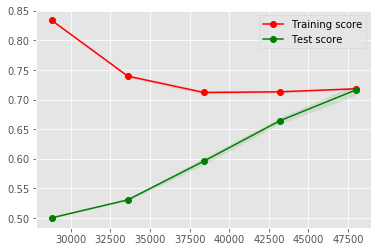

In [109]:
plot_learning_curve(clf1, X2_kbest, y2, 5)
plt.show()

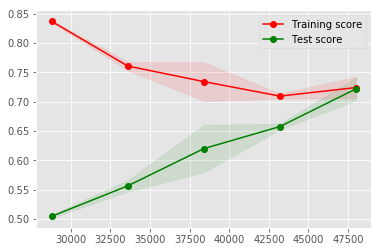

In [110]:
plot_learning_curve(clf2, X2_kbest, y2, 5)
plt.show()

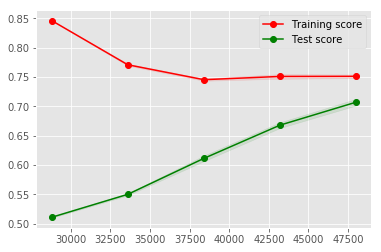

In [111]:
plot_learning_curve(clf3, X2_kbest, y2, 5)
plt.show()

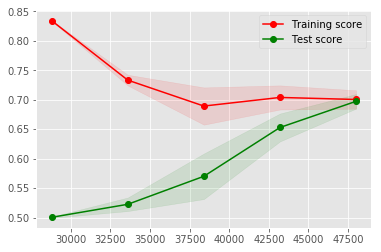

In [112]:
plot_learning_curve(clf4, X2_scaled, y2, 5)
plt.show()

In [113]:
plot_learning_curve(clf5, X2_scaled, y2, 5)
plt.show()

/home/jun_wang0226/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/home/jun_wang0226/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/home/jun_wang0226/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/home/jun_wang0226/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/home/jun_wang0226/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted b

KeyboardInterrupt: 

从模型效果来看，几个模型都并没有出现过拟合现象，但是另一方面几乎所有模型的表现都表明模型依然处于一种欠拟合状态